# Backpropagation custom implementation

## Loading data 

In [2]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>

## Implementing Forward propagation, Backpropagation and Gradient checking

## Forward propagation 

In [4]:
def sigmoid(z):
  import math 
  '''In this function, we will compute the sigmoid(z)'''
  sig=1/(1+math.exp(-z))
  return sig

In [6]:
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point,5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1)

        part_2= np.tanh(part_1+w[6])
        
        part_3 = sigmoid(np.sin(w[2]*x[2])*(w[3]*x[3]+w[4]*x[4]) + w[7])
        Y=part_2+(part_3*w[8])
        L=(y-Y)**2
        d=-2*(y-Y)
        
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] = part_3
        forward_dict['tanh'] = part_2
        forward_dict['loss'] = L
        forward_dict['dy_pred'] = d
        
        return forward_dict

## Backward propagation

In [9]:
def backward_propagation(x,y,w,forward_dict):
    part_1=forward_dict['exp']
    part_3=forward_dict['sigmoid'] 
    part_2=forward_dict['tanh']
    L=forward_dict['loss'] 
    d=forward_dict['dy_pred'] 
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    dw1 = d*(1-(part_2)**2)*part_1*2*(w[0]*x[0]+w[1]*x[1])*x[0] #in dw1 compute derivative of L w.r.to w1
    dw2 = d*(1-(part_2)**2)*part_1*(w[0]*x[0]+w[1]*x[1])*x[1]*2 #in dw2 compute derivative of L w.r.to w2
    dw3 = d*part_3*(1-part_3)*w[8]*(w[3]*x[3]+w[4]*x[4])*np.cos(w[2]*x[2])*x[2]# in dw3 compute derivative of L w.r.to w3
    dw4 = d*part_3*(1-part_3)*w[8]*np.sin(w[2]*x[2])*x[3] # in dw4 compute derivative of L w.r.to w4
    dw5 = d*part_3*(1-part_3)*w[8]*np.sin(w[2]*x[2])*x[4] # in dw5 compute derivative of L w.r.to w5
    dw6 = d*(1-(part_2)**2)*part_1 # in dw6 compute derivative of L w.r.to w6
    dw7 = d*(1-(part_2)**2) # in dw7 compute derivative of L w.r.to w7
    dw8 = d*part_3*(1-part_3)*w[8] # in dw8 compute derivative of L w.r.to w8
    dw9 = d*part_3# in dw9 compute derivative of L w.r.to w9

    backward_dict={}
    backward_dict['dw1']= dw1
    backward_dict['dw2']= dw2
    backward_dict['dw3']= dw3
    backward_dict['dw4']= dw4
    backward_dict['dw5']= dw5
    backward_dict['dw6']= dw6
    backward_dict['dw7']= dw7
    backward_dict['dw8']= dw8
    backward_dict['dw9']= dw9
    #storing the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    return backward_dict

## Implementing Gradient checking 
 

In [11]:
w=np.random.rand(9)
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(backward_dict.values())
    
    approx_gradients_list=[]
    for i in range(9):
      W=w
      n=W[i]+0.00001
      w[i]=n
      l1=forward_propagation(x,y,W)['loss']
      W=w
      o=W[i]-0.0001
      W[i]=o
      l2=forward_propagation(x,y,W)['loss']
      ad=(l1-l2)/0.00002
      approx_gradients_list.append(ad)
    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
    
    return gradient_check_value

## Optimizer

### Algorithm with Vanilla update of weights

In [14]:
W=np.random.randn(9)
loss1=[]
for i in range(200):
  for j in range(len(X)):
    fwd=forward_propagation(X[j],y[j],W)
    bwd=list(backward_propagation(X[j],y[j],W,fwd).values())
    for i in range(9):
      W[i]=W[i]-0.01*bwd[i]
  l=forward_propagation(X[j],y[j],W)['loss']
  loss1.append(l)

In [15]:
epo=list(np.arange(1,201))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'loss')

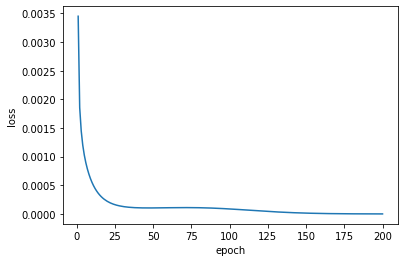

In [41]:
import seaborn as sns
p=sns.lineplot(epo,loss1,x="epoch",y="loss")
p.set_xlabel("epoch", fontsize = 10)
p.set_ylabel("loss", fontsize = 10)

### Algorithm with Momentum update of weights

In [27]:
W=np.random.randn(9)
loss2=[]
v=[0,0,0,0,0,0,0,0,0]
for i in range(200):
  for j in range(len(X)):
    fwd=forward_propagation(X[j],y[j],W)
    bwd=list(backward_propagation(X[j],y[j],W,fwd).values())    
    for i in range(9):
      v[i]=0.9*v[i]+0.1*bwd[i]
      W[i]=W[i]-v[i]
  l=forward_propagation(X[j],y[j],W)['loss']  
  loss2.append(l)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'loss')

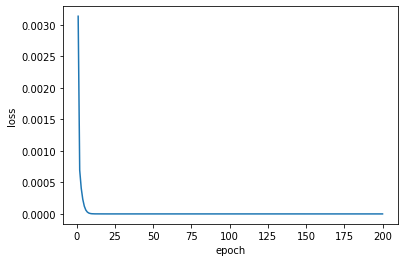

In [40]:
import seaborn as sns
p=sns.lineplot(epo,loss2,x="epoch",y="loss")
p.set_xlabel("epoch", fontsize = 10)
p.set_ylabel("loss", fontsize = 10)

### Algorithm with Adam update of weights

In [35]:
W=np.random.randn(9)
loss3=[]
v=[0,0,0,0,0,0,0,0,0]
m=[0,0,0,0,0,0,0,0,0]
for k in range(200):
  for j in range(len(X)):
    fwd=forward_propagation(X[j],y[j],W)
    bwd=list(backward_propagation(X[j],y[j],W,fwd).values())    
    for i in range(9):
      m[i]=0.9*m[i]+0.1*bwd[i]
      m[i]=0.9*m[i]+0.1*(bwd[i])**2
      m[i]=m[i]#/(1-0.9)**(k+j+1))
      v[i]=v[i]#/(1-0.99)**(k+j+1))
      W[i]=W[i]-(0.1*m[i])/((v[i]+0.1)**(0.5))
  l=forward_propagation(X[j],y[j],W)['loss']  
  loss3.append(l)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'loss')

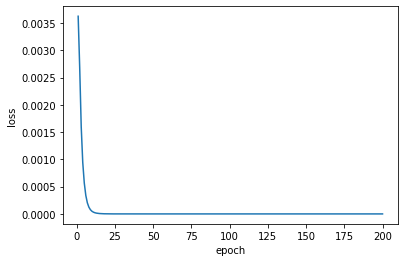

In [39]:
import seaborn as sns
p=sns.lineplot(epo,loss3,x="epoch",y="loss")
p.set_xlabel("epoch", fontsize = 10)
p.set_ylabel("loss", fontsize = 10)

Comparision plot between epochs and loss with different optimizers. 

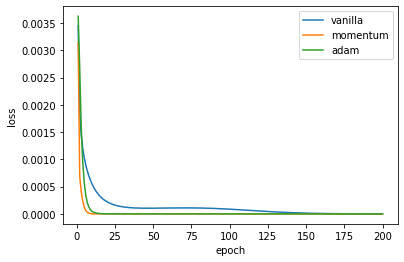

In [44]:
#plot the graph between loss vs epochs for all 3 optimizers.
import matplotlib.pyplot as plt
plt.plot(epo,loss1,label = "vanilla")
plt.plot(epo,loss2,label = "momentum")
plt.plot(epo,loss3,label = "adam")
plt.xlabel("epoch", fontsize = 10)
plt.ylabel("loss", fontsize = 10)
plt.legend()
plt.show()
